<a href="https://colab.research.google.com/github/GAUTHAM09012004/Component_Sevice_Predictor/blob/main/ml/ml_sandbox.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd

file_path = '/content/drive/MyDrive/caterpillar_data.csv'
data = pd.read_csv(file_path)

data.head(), data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Id         1000 non-null   int64  
 1   Time       1000 non-null   object 
 2   Machine    1000 non-null   object 
 3   Component  1000 non-null   object 
 4   Parameter  1000 non-null   object 
 5   Value      1000 non-null   float64
dtypes: float64(1), int64(1), object(4)
memory usage: 47.0+ KB


(   Id                  Time              Machine Component  \
 0  48  2022-06-03T08:09:29Z          Excavator_1    Engine   
 1   5  2022-05-12T02:05:42Z  Articulated_Truck_1      Fuel   
 2  24  2022-05-27T06:25:04Z  Articulated_Truck_1    Engine   
 3  23  2022-05-12T20:36:47Z     Backhoe_Loader_1     Drive   
 4  42  2022-06-28T04:06:30Z          Excavator_1    Engine   
 
                Parameter  Value  
 0            Temparature  104.0  
 1          Water in Fuel   70.0  
 2            Temparature  104.0  
 3  Transmission Pressure  231.0  
 4           Oil Pressure   39.0  ,
 None)

In [4]:
thresholds = {
    "Engine Speed": {"high": 1800, "probability": "Medium"},
    "Engine Temperature": {"high": 105, "probability": "High"},
    "Engine Oil Pressure": {"low": 25, "high": 65, "probability": "High"},
    "Brake Control": {"low": 1, "probability": "Medium"},
    "Transmission Pressure": {"low": 200, "high": 450, "probability": "Medium"},
    "Pedal Sensor": {"high": 4.7, "probability": "Low"},
    "Water Fuel": {"high": 1800, "probability": "High"},
    "Fuel Level": {"low": 1, "probability": "Low"},
    "Fuel Pressure": {"low": 35, "high": 65, "probability": "Low"},
    "Fuel Temperature": {"high": 400, "probability": "High"},
    "System Voltage": {"low": 12.0, "high": 15.0, "probability": "High"},
    "Exhaust Gas Temperature": {"high": 365, "probability": "High"},
    "Hydraulic Pump Rate": {"high": 125, "probability": "Medium"},
    "Air Filter Pressure Drop": {"low": 20, "probability": "Medium"}
}

def determine_failure_probability(row):
    param = row["Parameter"]
    value = row["Value"]

    if param in thresholds:
        threshold = thresholds[param]
        if "low" in threshold and value < threshold["low"]:
            return threshold["probability"]
        elif "high" in threshold and value > threshold["high"]:
            return threshold["probability"]

    return "Low"

data["Failure Probability"] = data.apply(determine_failure_probability, axis=1)
data.head()


,Id,Time,Machine,Component,Parameter,Value,Failure Probability
0,48,2022-06-03T08:09:29Z,Excavator_1,Engine,Temparature,104.0,Low
1,5,2022-05-12T02:05:42Z,Articulated_Truck_1,Fuel,Water in Fuel,70.0,Low
2,24,2022-05-27T06:25:04Z,Articulated_Truck_1,Engine,Temparature,104.0,Low
3,23,2022-05-12T20:36:47Z,Backhoe_Loader_1,Drive,Transmission Pressure,231.0,Low
4,42,2022-06-28T04:06:30Z,Excavator_1,Engine,Oil Pressure,39.0,Low


In [5]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

label_encoders = {}
for column in ["Machine", "Component", "Parameter", "Failure Probability"]:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le

X = data.drop(columns=["Failure Probability", "Time", "Id"])
y = data["Failure Probability"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape


((800, 4), (200, 4), (800,), (200,))

In [6]:
print(X_train.head())
print(y_train.head())

     Machine  Component  Parameter  Value
29         4          3          2  304.0
535        4          0          1    9.0
695        3          0          6    4.1
557        0          1          5   56.0
836        1          2         10  279.0
29     1
535    1
695    1
557    1
836    1
Name: Failure Probability, dtype: int64


<ipython-input-35-94c31aeb29e8>:20: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data = data.fillna(method='ffill').fillna(method='bfill')


X shape: (100, 14)
y shape: (100,)
Train MSE: 0.0004, Test MSE: 0.0008
Train RMSE: 0.0211, Test RMSE: 0.0286
Train R² Score: 0.5536
Test R² Score: 0.4905


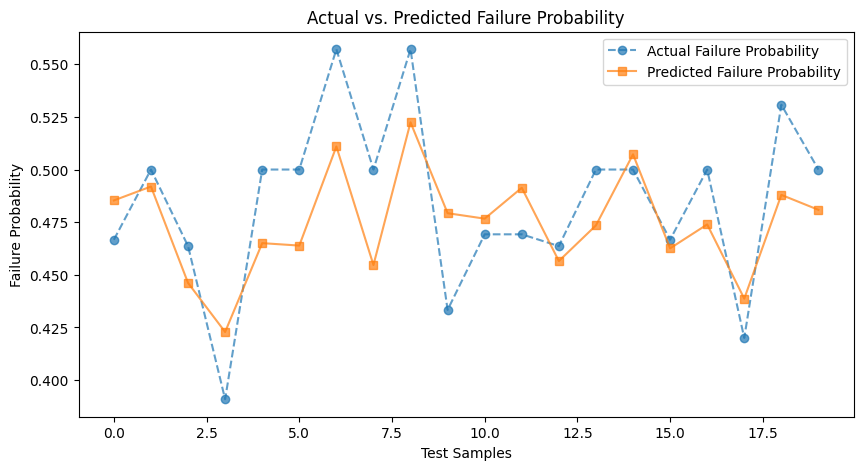

Predicted Failure Probability: 0.4809
Cross-validation MSE scores: [0.0017604140683330377, 0.0011917511540680673, 0.0005792143723365839, 0.0010215083262550815, 0.0009240312409200068]
Mean CV MSE: 0.0011


In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, TimeSeriesSplit
from sklearn.metrics import mean_squared_error, r2_score

def prepare_data(data):
    relevant_columns = [
        'Engine Oil Pressure', 'Engine Speed', 'Engine Temperature',
        'Brake Control', 'Transmission Pressure', 'Pedal Sensor',
        'Water Fuel', 'Fuel Level', 'Fuel Pressure', 'Fuel Temperature',
        'System Voltage', 'Exhaust Gas Temperature',
        'Hydraulic Pump Rate', 'Air Filter Pressure Drop',
        'Overall Failure Probability'
    ]
    data = data[relevant_columns]

    data = data.fillna(method='ffill').fillna(method='bfill')

    scaler = MinMaxScaler(feature_range=(0, 1))
    scaled_data = scaler.fit_transform(data.drop(columns=['Overall Failure Probability']))

    X = scaled_data
    y = data['Overall Failure Probability']
    return np.array(X), np.array(y), scaler, data.columns

def train_and_evaluate_model(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False, random_state=42)

    model = LinearRegression()
    model.fit(X_train, y_train)

    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    train_mse = mean_squared_error(y_train, y_train_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)
    train_r2 = r2_score(y_train, y_train_pred)
    test_r2 = r2_score(y_test, y_test_pred)

    print(f"Train MSE: {train_mse:.4f}, Test MSE: {test_mse:.4f}")
    print(f"Train RMSE: {np.sqrt(train_mse):.4f}, Test RMSE: {np.sqrt(test_mse):.4f}")
    print(f"Train R² Score: {train_r2:.4f}")
    print(f"Test R² Score: {test_r2:.4f}")

    plt.figure(figsize=(10, 5))
    plt.plot(y_test, label="Actual Failure Probability", marker='o', linestyle='dashed', alpha=0.7)
    plt.plot(y_test_pred, label="Predicted Failure Probability", marker='s', linestyle='solid', alpha=0.7)
    plt.xlabel("Test Samples")
    plt.ylabel("Failure Probability")
    plt.title("Actual vs. Predicted Failure Probability")
    plt.legend()
    plt.show()

    return model

def predict_failure_probability(model, X_last):
    prediction = model.predict([X_last])[0]
    print(f"Predicted Failure Probability: {prediction:.4f}")
    return prediction

def perform_cross_validation(X, y, n_splits=5):
    tscv = TimeSeriesSplit(n_splits=n_splits)
    mse_scores = []

    for train_index, test_index in tscv.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]

        model = LinearRegression()
        model.fit(X_train, y_train)

        y_pred = model.predict(X_test)
        mse = mean_squared_error(y_test, y_pred)
        mse_scores.append(mse)

    print(f"Cross-validation MSE scores: {mse_scores}")
    print(f"Mean CV MSE: {np.mean(mse_scores):.4f}")

data = pd.read_csv('/content/drive/MyDrive/machine_data.csv')

X, y, scaler, column_names = prepare_data(data)

print("X shape:", X.shape)
print("y shape:", y.shape)

model = train_and_evaluate_model(X, y)

X_last = X[-1]
predict_failure_probability(model, X_last)

perform_cross_validation(X, y)


In [33]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split, TimeSeriesSplit
from sklearn.metrics import accuracy_score, classification_report, mean_squared_error
import matplotlib.pyplot as plt

def prepare_data(data):
    relevant_columns = [
        'Engine Oil Pressure', 'Engine Speed', 'Engine Temperature',
        'Brake Control', 'Transmission Pressure', 'Pedal Sensor',
        'Water Fuel', 'Fuel Level', 'Fuel Pressure', 'Fuel Temperature',
        'System Voltage', 'Exhaust Gas Temperature',
        'Hydraulic Pump Rate', 'Air Filter Pressure Drop',
        'Overall Failure Probability'
    ]
    data = data[relevant_columns]

    data = data.fillna(method='ffill').fillna(method='bfill')

    scaler = MinMaxScaler(feature_range=(0, 1))
    scaled_data = scaler.fit_transform(data.drop(columns=['Overall Failure Probability']))

    X = scaled_data
    y = (data['Overall Failure Probability'] >= 0.5).astype(int)
    return np.array(X), np.array(y), scaler, data.columns

def train_and_evaluate_model(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False, random_state=42)

    model = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
    model.fit(X_train, y_train)

    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)

    print(f"Train Accuracy: {train_accuracy:.4f}, Test Accuracy: {test_accuracy:.4f}")
    print("Classification Report:\n", classification_report(y_test, y_test_pred))

    return model

def predict_breakdown(model, X_last, column_names, thresholds):
    prediction = model.predict([X_last])[0]

    if prediction == 1:
        print("Potential breakdown detected!")
    else:
        print("No breakdown predicted.")

    return prediction

def perform_cross_validation(X, y, n_splits=5):
    tscv = TimeSeriesSplit(n_splits=n_splits)
    cv_scores = []

    for train_index, test_index in tscv.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]

        model = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
        model.fit(X_train, y_train)

        accuracy = model.score(X_test, y_test)
        cv_scores.append(accuracy)

    print(f"Cross-validation scores: {cv_scores}")
    print(f"Mean CV score: {np.mean(cv_scores):.4f}")

data = pd.read_csv('/content/drive/MyDrive/machine_data.csv')

X, y, scaler, column_names = prepare_data(data)

print("X shape:", X.shape)
print("y shape:", y.shape)

model = train_and_evaluate_model(X, y)

X_last = X[-1]
predict_breakdown(model, X_last, column_names, None)

perform_cross_validation(X, y)

<ipython-input-33-2e028f36c95d>:20: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data = data.fillna(method='ffill').fillna(method='bfill')


X shape: (100, 14)
y shape: (100,)
Train Accuracy: 1.0000, Test Accuracy: 0.6500
Classification Report:
               precision    recall  f1-score   support

           0       0.56      1.00      0.72         9
           1       1.00      0.36      0.53        11

    accuracy                           0.65        20
   macro avg       0.78      0.68      0.63        20
weighted avg       0.80      0.65      0.62        20

No breakdown predicted.
Cross-validation scores: [0.1875, 0.5, 0.8125, 0.875, 0.5625]
Mean CV score: 0.5875


     Unnamed: 0      Time              Machine Component  \
0             5  02:05:42  Articulated_Truck_1      Fuel   
1            24  06:25:04  Articulated_Truck_1    Engine   
2             1  01:17:39  Articulated_Truck_1     Drive   
3            26  02:21:39  Articulated_Truck_1     Drive   
4             2  21:02:41  Articulated_Truck_1      Misc   
..          ...       ...                  ...       ...   
195          45  06:26:08  Articulated_Truck_1    Engine   
196           4  11:13:39  Articulated_Truck_1     Drive   
197          20  09:48:46  Articulated_Truck_1     Drive   
198          19  13:06:28  Articulated_Truck_1      Fuel   
199          23  13:19:07  Articulated_Truck_1      Fuel   

                   Parameter   Value        Date  
0              Water in Fuel    70.0  2022-05-12  
1                Temparature   104.0  2022-05-27  
2              Brake Control     2.0  2022-06-28  
3               Pedal Sensor     3.9  2022-06-09  
4    Exhaust Gas Tempara

<ipython-input-16-c75fcb5ddc88>:25: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  pivot_data = pivot_data.fillna(method='ffill').fillna(method='bfill')
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 4s 98ms/step - loss: 0.3268 - val_loss: 0.2563
Epoch 2/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.2089 - val_loss: 0.1419
Epoch 3/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.1517 - val_loss: 0.1136
Epoch 4/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.1195 - val_loss: 0.0975
Epoch 5/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0990 - val_loss: 0.0973
Epoch 6/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0945 - val_loss: 0.0930
Epoch 7/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0846 - val_loss: 0.0886
Epoch 8/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0771 - val_loss: 0.0867
Epoch 9/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0699 - val_loss: 0.0872
Epoch 10/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0682 - val_loss: 0.0788
Epoch 11/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0635 - val_loss: 0.0766
Epoch 12/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0600 - val_lo

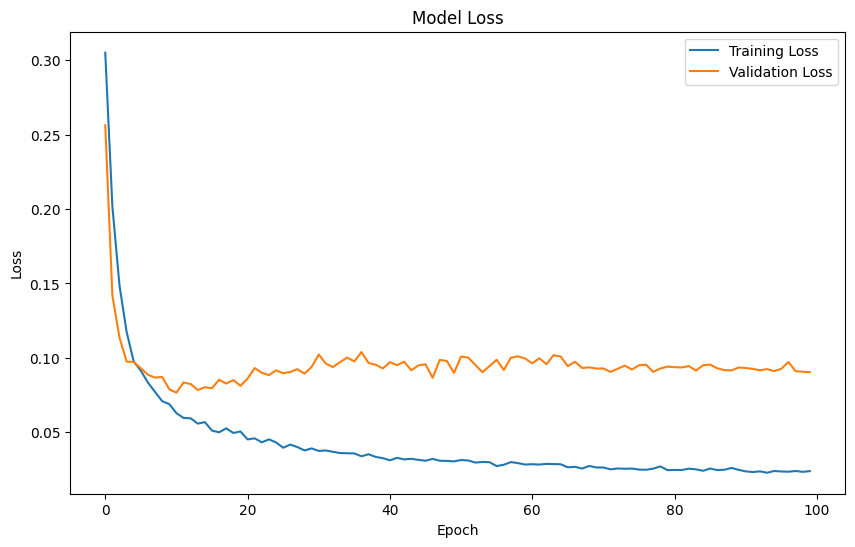

In [16]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, TimeSeriesSplit
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
import tensorflow as tf




def prepare_data(data, look_back=30):
    data['DateTime'] = pd.to_datetime(data['Time'])

    data = data.sort_values('DateTime')

    pivot_data = data.pivot_table(index='DateTime', columns=['Component', 'Parameter'], values='Value', aggfunc='first')
    pivot_data.columns = [f'{col[0]}_{col[1]}' for col in pivot_data.columns]

    print("Columns with NaN values:", pivot_data.columns[pivot_data.isna().any()].tolist())
    print("NaN count before handling:", pivot_data.isna().sum().sum())

    pivot_data = pivot_data.fillna(method='ffill').fillna(method='bfill')

    print("NaN count after handling:", pivot_data.isna().sum().sum())

    relevant_columns = ['Engine_Speed', 'Engine_Oil Pressure', 'Engine_Temparature',
                        'Drive_Brake Control', 'Drive_Transmission Pressure', 'Drive_Pedal Sensor',
                        'Fuel_Water in Fuel', 'Fuel_Level', 'Fuel_Pressure', 'Fuel_Temparature',
                        'Misc_System Voltage', 'Misc_Exhaust Gas Temparature',
                        'Misc_Hydraulic Pump Rate', 'Misc_Air Filter Pressure']
    pivot_data = pivot_data[relevant_columns]

    if pivot_data.isna().sum().sum() > 0:
        print("Warning: There are still NaN values in the data.")
        print(pivot_data.isna().sum())
        pivot_data = pivot_data.dropna()

    scaler = MinMaxScaler(feature_range=(0, 1))
    scaled_data = scaler.fit_transform(pivot_data)

    X, y = [], []
    for i in range(len(scaled_data) - look_back):
        X.append(scaled_data[i:(i + look_back), :])
        y.append(scaled_data[i + look_back, :])

    return np.array(X), np.array(y), scaler, pivot_data.columns


def predict_breakdown(model, last_sequence, scaler, thresholds, column_names, days_to_predict=30):
    predictions = []
    d = []
    col1 = []
    current_sequence = last_sequence.copy()

    for _ in range(days_to_predict):
        prediction = model.predict(current_sequence.reshape(1, current_sequence.shape[0], current_sequence.shape[1]))
        for i in prediction:
          predictions.append(i)
        current_sequence = np.roll(current_sequence, -1, axis=0)
        current_sequence[-1] = prediction

    predictions = scaler.inverse_transform(np.array(predictions))

    breakdown_occurred = False


    for day, prediction in enumerate(predictions):
        if breakdown_occurred:
            break
        for i, col in enumerate(column_names):
            if col in thresholds:
                low, high = thresholds[col]
                if prediction[i] < low or prediction[i] >= high:
                    print(f"Potential breakdown on day {day+3} due to {col}: {prediction[i]}")
                    pred = prediction[i]
                    breakdown_occurred = True
                    return day, pred


def create_model(input_shape):
    model = Sequential([
        LSTM(50, return_sequences=True, input_shape=input_shape),
        Dropout(0.2),
        LSTM(50, return_sequences=False),
        Dropout(0.2),
        Dense(25),
        Dense(input_shape[1])
    ])
    model.compile(optimizer='adam', loss='mse')
    return model

def train_and_evaluate_model(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

    model = create_model((X.shape[1], X.shape[2]))
    history = model.fit(X_train, y_train, epochs=100, batch_size=32,
                        validation_data=(X_test, y_test), verbose=1)

    train_predictions = model.predict(X_train)
    test_predictions = model.predict(X_test)

    train_mse = mean_squared_error(y_train, train_predictions)
    test_mse = mean_squared_error(y_test, test_predictions)
    train_mae = mean_absolute_error(y_train, train_predictions)
    test_mae = mean_absolute_error(y_test, test_predictions)

    print(f"Train MSE: {train_mse:.4f}, Test MSE: {test_mse:.4f}")
    print(f"Train MAE: {train_mae:.4f}, Test MAE: {test_mae:.4f}")

    plt.figure(figsize=(10, 6))
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend()
    plt.show()

    return model,test_predictions

def perform_cross_validation(X, y, n_splits=5):
    tscv = TimeSeriesSplit(n_splits=n_splits)
    cv_scores = []

    for train_index, test_index in tscv.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]

        model = create_model((X.shape[1], X.shape[2]))
        model.fit(X_train, y_train, epochs=5, batch_size=32, verbose=0)

        score = model.evaluate(X_test, y_test, verbose=0)
        cv_scores.append(score)

    print(f"Cross-validation scores: {cv_scores}")
    print(f"Mean CV score: {np.mean(cv_scores):.4f}")

def sensitivity_analysis(model, X, scaler, thresholds, column_names):
    sensitivity = {}
    baseline_pred = model.predict(X[-1].reshape(1, X.shape[1], X.shape[2]))

    for i, col in enumerate(column_names):
        X_perturbed = X[-1].copy()
        X_perturbed[:, i] *= 1.2  # Increase by 10%
        perturbed_pred = model.predict(X_perturbed.reshape(1, X.shape[1], X.shape[2]))
        sensitivity[col] = np.mean(np.abs(perturbed_pred - baseline_pred))
    print("Feature sensitivities:")
    for col, sens in sorted(sensitivity.items(), key=lambda x: x[1], reverse=True):
        print(f"{col}: {sens:.4f}")

def check_feature_scaling(data):
    numerical_cols = data.select_dtypes(include=[np.number]).columns
    numerical_data = data[numerical_cols]

    scaler = MinMaxScaler(feature_range=(0, 1))
    scaled_data = scaler.fit_transform(numerical_data)

    print("Scaled Data Statistics:")
    print(pd.DataFrame(scaled_data, columns=numerical_data.columns).describe())


data = pd.read_excel('/content/drive/MyDrive/truck.xlsx')
import pandas as pd


df = pd.DataFrame(data)

df['Time'] = pd.to_datetime(df['Time'])

df['Date'] = df['Time'].dt.date
df['Time'] = df['Time'].dt.time

print(df)

X, y, scaler, column_names = prepare_data(data)

print("X shape:", X.shape)
print("y shape:", y.shape)

print("NaN in X:", np.isnan(X).any())
print("NaN in y:", np.isnan(y).any())

if np.isnan(X).any() or np.isnan(y).any():
    print("Warning: There are still NaN values in X or y.")

model,test_predictions = train_and_evaluate_model(X, y)

thresholds = { 'Engine_Oil Pressure': (25, 65),
    'Engine_Speed': (0, 1800),
    'Engine_Temparature': (0, 105),
    'Drive_Brake Control': (1, 9),
    'Drive_Pedal Sensor': (0, 4.7),
    'Fuel_Water in Fuel': (0, 1800),
    'Fuel_Level': (1, 10),
    'Fuel_Pressure': (35, 75),
    'Fuel_Temparature': (-1, 400),
    'Misc_System Voltage': (12, 15), #ed
    'Misc_Exhaust Gas Temparature': (0, 220), #ed
    'Misc_Hydraulic Pump Rate': (0, 125),
    'Misc_Air Filter Pressure': (15, 40)}



In [17]:
print(type(last_sequence))


<class 'numpy.ndarray'>


     Unnamed: 0      Time              Machine Component  \
0             5  02:05:42  Articulated_Truck_1      Fuel   
1            24  06:25:04  Articulated_Truck_1    Engine   
2             1  01:17:39  Articulated_Truck_1     Drive   
3            26  02:21:39  Articulated_Truck_1     Drive   
4             2  21:02:41  Articulated_Truck_1      Misc   
..          ...       ...                  ...       ...   
195          45  06:26:08  Articulated_Truck_1    Engine   
196           4  11:13:39  Articulated_Truck_1     Drive   
197          20  09:48:46  Articulated_Truck_1     Drive   
198          19  13:06:28  Articulated_Truck_1      Fuel   
199          23  13:19:07  Articulated_Truck_1      Fuel   

                   Parameter   Value        Date  
0              Water in Fuel    70.0  2022-05-12  
1                Temparature   104.0  2022-05-27  
2              Brake Control     2.0  2022-06-28  
3               Pedal Sensor     3.9  2022-06-09  
4    Exhaust Gas Tempara

<ipython-input-19-6e5677d247ba>:27: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  pivot_data = pivot_data.fillna(method='ffill').fillna(method='bfill')
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 101ms/step - loss: 0.3267 - val_loss: 0.2303
Epoch 2/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.2274 - val_loss: 0.1787
Epoch 3/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.1532 - val_loss: 0.1224
Epoch 4/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.1243 - val_loss: 0.1043
Epoch 5/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0982 - val_loss: 0.0795
Epoch 6/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0935 - val_loss: 0.0880
Epoch 7/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0784 - val_loss: 0.0884
Epoch 8/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0717 - val_loss: 0.0843
Epoch 9/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0691 - val_loss: 0.0750
Epoch 10/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0659 - val_loss: 0.0742
Epoch 11/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0617 - val_loss: 0.0772
Epoch 12/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0581 - val_l

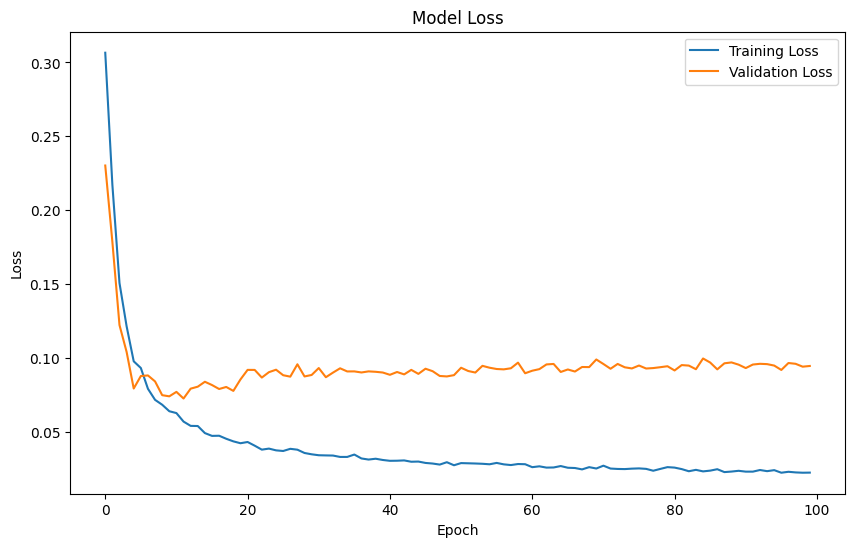

                   Time              Machine Component              Parameter  \
0  2022-03-01T15:00:00Z     Backhoe_Loader_1      Fuel               Pressure   
1  2022-03-14T00:00:00Z          Excavator_1     Drive  Transmission Pressure   
2  2022-03-01T05:00:00Z              Dozer_1    Engine           Oil Pressure   
3  2022-05-29T16:00:00Z     Backhoe_Loader_1     Drive           Pedal Sensor   
4  2022-05-24T02:00:00Z  Articulated_Truck_1      Fuel          Water in Fuel   

        Value  
0  240.473966  
1  224.751304  
2   50.683860  
3  206.692053  
4  125.321053  
Columns with NaN values: ['Drive_Brake Control', 'Drive_Pedal Sensor', 'Drive_Transmission Pressure', 'Engine_Oil Pressure', 'Engine_Speed', 'Engine_Temparature', 'Fuel_Level', 'Fuel_Pressure', 'Fuel_Temparature', 'Fuel_Water in Fuel', 'Misc_Air Filter Pressure', 'Misc_Exhaust Gas Temparature', 'Misc_Hydraulic Pump Rate', 'Misc_System Voltage']
NaN count before handling: 1273
NaN count after handling: 0
X shape: (

<ipython-input-19-6e5677d247ba>:211: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  timestamps = pd.date_range(start='2022-01-01', end='2022-06-30', freq='H').strftime('%Y-%m-%dT%H:%M:%SZ').tolist() # Fixed: Changed start date to '2022-01-01'
<ipython-input-19-6e5677d247ba>:27: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  pivot_data = pivot_data.fillna(method='ffill').fillna(method='bfill')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━

In [19]:
!pip install pandas numpy scikit-learn tensorflow matplotlib

import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, TimeSeriesSplit
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
import tensorflow as tf




def prepare_data(data, look_back=30):
    data['DateTime'] = pd.to_datetime(data['Time'])

    data = data.sort_values('DateTime')

    pivot_data = data.pivot_table(index='DateTime', columns=['Component', 'Parameter'], values='Value', aggfunc='first')
    pivot_data.columns = [f'{col[0]}_{col[1]}' for col in pivot_data.columns]

    print("Columns with NaN values:", pivot_data.columns[pivot_data.isna().any()].tolist())
    print("NaN count before handling:", pivot_data.isna().sum().sum())

    pivot_data = pivot_data.fillna(method='ffill').fillna(method='bfill')

    print("NaN count after handling:", pivot_data.isna().sum().sum())

    relevant_columns = ['Engine_Speed', 'Engine_Oil Pressure', 'Engine_Temparature',
                        'Drive_Brake Control', 'Drive_Transmission Pressure', 'Drive_Pedal Sensor',
                        'Fuel_Water in Fuel', 'Fuel_Level', 'Fuel_Pressure', 'Fuel_Temparature',
                        'Misc_System Voltage', 'Misc_Exhaust Gas Temparature',
                        'Misc_Hydraulic Pump Rate', 'Misc_Air Filter Pressure']
    pivot_data = pivot_data[relevant_columns]

    if pivot_data.isna().sum().sum() > 0:
        print("Warning: There are still NaN values in the data.")
        print(pivot_data.isna().sum())
        pivot_data = pivot_data.dropna()

    scaler = MinMaxScaler(feature_range=(0, 1))
    scaled_data = scaler.fit_transform(pivot_data)

    X, y = [], []
    for i in range(len(scaled_data) - look_back):
        X.append(scaled_data[i:(i + look_back), :])
        y.append(scaled_data[i + look_back, :])

    return np.array(X), np.array(y), scaler, pivot_data.columns


def predict_breakdown(model, last_sequence, scaler, thresholds, column_names, days_to_predict=30):
    predictions = []
    d = []
    col1 = []
    current_sequence = last_sequence.copy()

    for _ in range(days_to_predict):
        prediction = model.predict(current_sequence.reshape(1, current_sequence.shape[0], current_sequence.shape[1]))
        for i in prediction:
          predictions.append(i)
        current_sequence = np.roll(current_sequence, -1, axis=0)
        current_sequence[-1] = prediction

    predictions = scaler.inverse_transform(np.array(predictions))

    breakdown_occurred = False


    for day, prediction in enumerate(predictions):
        if breakdown_occurred:
            break
        for i, col in enumerate(column_names):
            if col in thresholds:
                low, high = thresholds[col]
                if prediction[i] < low or prediction[i] >= high:
                    print(f"Potential breakdown on day {day+3} due to {col}: {prediction[i]}")
                    pred = prediction[i]
                    breakdown_occurred = True
                    return day, pred


def create_model(input_shape):
    model = Sequential([
        LSTM(50, return_sequences=True, input_shape=input_shape),
        Dropout(0.2),
        LSTM(50, return_sequences=False),
        Dropout(0.2),
        Dense(25),
        Dense(input_shape[1])
    ])
    model.compile(optimizer='adam', loss='mse')
    return model

def train_and_evaluate_model(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

    model = create_model((X.shape[1], X.shape[2]))
    history = model.fit(X_train, y_train, epochs=100, batch_size=32,
                        validation_data=(X_test, y_test), verbose=1)

    train_predictions = model.predict(X_train)
    test_predictions = model.predict(X_test)

    train_mse = mean_squared_error(y_train, train_predictions)
    test_mse = mean_squared_error(y_test, test_predictions)
    train_mae = mean_absolute_error(y_train, train_predictions)
    test_mae = mean_absolute_error(y_test, test_predictions)

    print(f"Train MSE: {train_mse:.4f}, Test MSE: {test_mse:.4f}")
    print(f"Train MAE: {train_mae:.4f}, Test MAE: {test_mae:.4f}")

    plt.figure(figsize=(10, 6))
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend()
    plt.show()

    return model,test_predictions

def perform_cross_validation(X, y, n_splits=5):
    tscv = TimeSeriesSplit(n_splits=n_splits)
    cv_scores = []

    for train_index, test_index in tscv.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]

        model = create_model((X.shape[1], X.shape[2]))
        model.fit(X_train, y_train, epochs=5, batch_size=32, verbose=0)

        score = model.evaluate(X_test, y_test, verbose=0)
        cv_scores.append(score)

    print(f"Cross-validation scores: {cv_scores}")
    print(f"Mean CV score: {np.mean(cv_scores):.4f}")

def sensitivity_analysis(model, X, scaler, thresholds, column_names):
    sensitivity = {}
    baseline_pred = model.predict(X[-1].reshape(1, X.shape[1], X.shape[2]))

    for i, col in enumerate(column_names):
        X_perturbed = X[-1].copy()
        X_perturbed[:, i] *= 1.2  # Increase by 10%
        perturbed_pred = model.predict(X_perturbed.reshape(1, X.shape[1], X.shape[2]))
        sensitivity[col] = np.mean(np.abs(perturbed_pred - baseline_pred))
    print("Feature sensitivities:")
    for col, sens in sorted(sensitivity.items(), key=lambda x: x[1], reverse=True):
        print(f"{col}: {sens:.4f}")

def check_feature_scaling(data):
    numerical_cols = data.select_dtypes(include=[np.number]).columns
    numerical_data = data[numerical_cols]

    scaler = MinMaxScaler(feature_range=(0, 1))
    scaled_data = scaler.fit_transform(numerical_data)

    print("Scaled Data Statistics:")
    print(pd.DataFrame(scaled_data, columns=numerical_data.columns).describe())


data = pd.read_excel('/content/drive/MyDrive/truck.xlsx')
import pandas as pd


df = pd.DataFrame(data)

df['Time'] = pd.to_datetime(df['Time'])

df['Date'] = df['Time'].dt.date
df['Time'] = df['Time'].dt.time

print(df)

X, y, scaler, column_names = prepare_data(data)

print("X shape:", X.shape)
print("y shape:", y.shape)

print("NaN in X:", np.isnan(X).any())
print("NaN in y:", np.isnan(y).any())

if np.isnan(X).any() or np.isnan(y).any():
    print("Warning: There are still NaN values in X or y.")

model,test_predictions = train_and_evaluate_model(X, y)

thresholds = { 'Engine_Oil Pressure': (25, 65),
    'Engine_Speed': (0, 1800),
    'Engine_Temparature': (0, 105),
    'Drive_Brake Control': (1, 9),
    'Drive_Pedal Sensor': (0, 4.7),
    'Fuel_Water in Fuel': (0, 1800),
    'Fuel_Level': (1, 10),
    'Fuel_Pressure': (35, 75),
    'Fuel_Temparature': (-1, 400),
    'Misc_System Voltage': (12, 15), #ed
    'Misc_Exhaust Gas Temparature': (0, 220), #ed
    'Misc_Hydraulic Pump Rate': (0, 125),
    'Misc_Air Filter Pressure': (15, 40)}

import pandas as pd
import numpy as np


timestamps = pd.date_range(start='2022-01-01', end='2022-06-30', freq='H').strftime('%Y-%m-%dT%H:%M:%SZ').tolist() # Fixed: Changed start date to '2022-01-01'

machines = ['Excavator_1', 'Articulated_Truck_1', 'Backhoe_Loader_1', 'Dozer_1']
components = ['Engine', 'Drive', 'Fuel', 'Misc']
parameters = {
    'Engine': ['Speed', 'Oil Pressure', 'Temparature'],
    'Drive': ['Brake Control', 'Transmission Pressure', 'Pedal Sensor'],
    'Fuel': ['Water in Fuel', 'Level', 'Pressure', 'Temparature'],
    'Misc': ['System Voltage', 'Exhaust Gas Temparature', 'Hydraulic Pump Rate', 'Air Filter Pressure']
}

data = {
    'Time': np.random.choice(timestamps, size=100),
    'Machine': np.random.choice(machines, size=100),
    'Component': [],
    'Parameter': [],
    'Value': np.random.uniform(low=0, high=250, size=100)
}

for _ in range(100):
    component = np.random.choice(components)
    parameter = np.random.choice(parameters[component])
    data['Component'].append(component)
    data['Parameter'].append(parameter)

test_df = pd.DataFrame(data)

print(test_df.head())

Z1, y, scaler, column_names = prepare_data(test_df)

print("X shape:", Z1.shape)
print("y shape:", y.shape)

last_sequence= Z1[-1]

days_until_breakdown, failing_parameter = predict_breakdown(model, last_sequence, scaler, thresholds, column_names)

In [20]:
Z1, y, scaler, column_names = prepare_data(test_df)

print("X shape:", Z1.shape)
print("y shape:", y.shape)


Columns with NaN values: ['Drive_Brake Control', 'Drive_Pedal Sensor', 'Drive_Transmission Pressure', 'Engine_Oil Pressure', 'Engine_Speed', 'Engine_Temparature', 'Fuel_Level', 'Fuel_Pressure', 'Fuel_Temparature', 'Fuel_Water in Fuel', 'Misc_Air Filter Pressure', 'Misc_Exhaust Gas Temparature', 'Misc_Hydraulic Pump Rate', 'Misc_System Voltage']
NaN count before handling: 1273
NaN count after handling: 0
X shape: (68, 30, 14)
y shape: (68, 14)


<ipython-input-19-6e5677d247ba>:27: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  pivot_data = pivot_data.fillna(method='ffill').fillna(method='bfill')


In [21]:
last_sequence= Z1[-1]

days_until_breakdown, failing_parameter = predict_breakdown(model, last_sequence, scaler, thresholds, column_names)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 249ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/ste

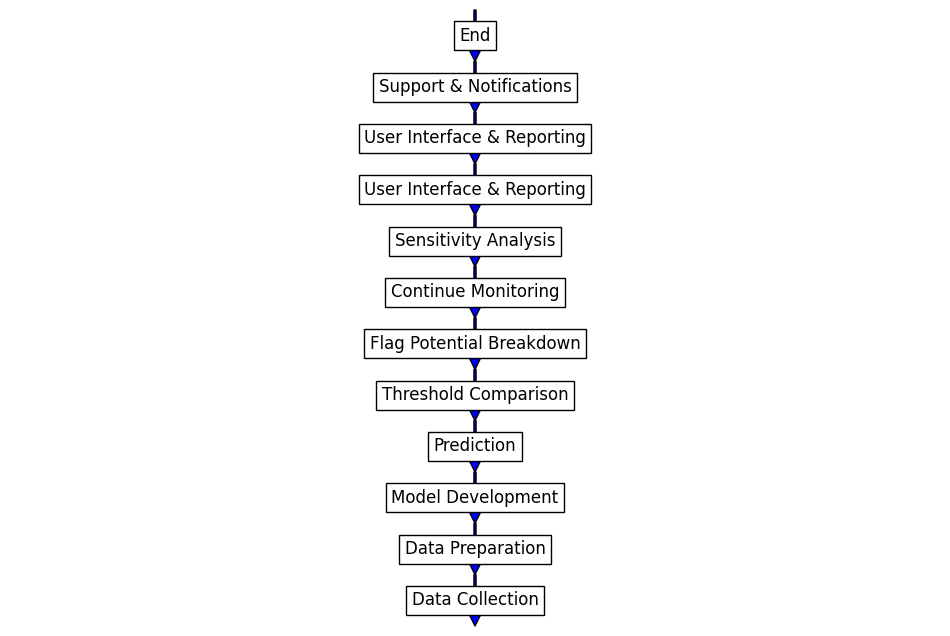

In [23]:
import matplotlib.pyplot as plt
from matplotlib.sankey import Sankey

flowchart_data = [
    ("Start", "Data Collection"),
    ("Data Collection", "Data Preparation"),
    ("Data Preparation", "Model Development"),
    ("Model Development", "Prediction"),
    ("Prediction", "Threshold Comparison"),
    ("Threshold Comparison", "Flag Potential Breakdown"),
    ("Threshold Comparison", "Continue Monitoring"),
    ("Flag Potential Breakdown", "Sensitivity Analysis"),
    ("Sensitivity Analysis", "User Interface & Reporting"),
    ("Continue Monitoring", "User Interface & Reporting"),
    ("User Interface & Reporting", "Support & Notifications"),
    ("Support & Notifications", "End"),
]

fig, ax = plt.subplots(figsize=(12, 8))

for i, (start, end) in enumerate(flowchart_data):
    ax.annotate('', xy=(0.5, i/len(flowchart_data)), xytext=(0.5, (i+1)/len(flowchart_data)),
                arrowprops=dict(facecolor='blue', edgecolor='black', width=1.5))

for i, (start, end) in enumerate(flowchart_data):
    ax.text(0.5, (i+0.5)/len(flowchart_data), f"{end}", fontsize=12, ha='center', va='center', bbox=dict(facecolor='white', edgecolor='black'))

ax.axis('off')
plt.show()


In [24]:
import pandas as pd
import numpy as np
import random
from datetime import datetime, timedelta

random.seed(42)
np.random.seed(42)

thresholds = {
    "Engine Oil Pressure": {"low": 25, "high": 65, "prob": "High"},
    "Engine Speed": {"high": 1800, "prob": "Medium"},
    "Engine Temperature": {"high": 105, "prob": "High"},
    "Brake Control": {"low": 1, "prob": "Medium"},
    "Transmission Pressure": {"low": 200, "high": 450, "prob": "Medium"},
    "Pedal Sensor": {"high": 4.7, "prob": "Low"},
    "Water Fuel": {"high": 1800, "prob": "High"},
    "Fuel Level": {"low": 1, "prob": "Low"},
    "Fuel Pressure": {"low": 35, "high": 65, "prob": "Low"},
    "Fuel Temperature": {"high": 400, "prob": "High"},
    "System Voltage": {"low": 12.0, "high": 15.0, "prob": "High"},
    "Exhaust Gas Temperature": {"high": 365, "prob": "High"},
    "Hydraulic Pump Rate": {"high": 125, "prob": "Medium"},
    "Air Filter Pressure Drop": {"low": 20, "prob": "Medium"},
}

def generate_value(param, threshold):
    if "low" in threshold and "high" in threshold:
        return np.random.uniform(threshold["low"], threshold["high"]) + np.random.uniform(-10, 10)
    elif "low" in threshold:
        return np.random.uniform(0, threshold["low"]) + np.random.uniform(-5, 5)
    elif "high" in threshold:
        return np.random.uniform(threshold["high"], threshold["high"] + 200) + np.random.uniform(-50, 50)
    else:
        return np.random.uniform(0, 100)

def determine_failure_probability(value, threshold):
    if "low" in threshold and value < threshold["low"]:
        return threshold["prob"]
    if "high" in threshold and value > threshold["high"]:
        return threshold["prob"]
    return "Low"

num_records = 100
start_date = datetime.now()
data = []

for i in range(num_records):
    record = {"date": start_date.date(), "time": start_date.time()}
    for param, threshold in thresholds.items():
        value = generate_value(param, threshold)
        record[param] = round(value, 2)
        record[f"{param} Failure Probability"] = determine_failure_probability(value, threshold)
    data.append(record)
    start_date += timedelta(minutes=30)

df = pd.DataFrame(data)
df.head()


,date,time,Engine Oil Pressure,Engine Oil Pressure Failure Probability,Engine Speed,Engine Speed Failure Probability,Engine Temperature,Engine Temperature Failure Probability,Brake Control,Brake Control Failure Probability,...,Fuel Temperature,Fuel Temperature Failure Probability,System Voltage,System Voltage Failure Probability,Exhaust Gas Temperature,Exhaust Gas Temperature Failure Probability,Hydraulic Pump Rate,Hydraulic Pump Rate Failure Probability,Air Filter Pressure Drop,Air Filter Pressure Drop Failure Probability
0,2025-03-27,03:51:31.468444,49.00,Low,1956.26,Medium,101.80,Low,3.72,Low,...,465.51,High,6.63,High,410.07,High,244.73,Medium,4.14,Medium
1,2025-03-27,04:21:31.468444,39.63,Low,1888.56,Medium,162.90,High,4.05,Low,...,464.35,High,7.34,High,586.43,High,352.38,Medium,16.18,Medium
2,2025-03-27,04:51:31.468444,22.46,High,1791.58,Low,159.87,High,-0.60,Medium,...,564.27,High,5.79,High,398.28,High,309.95,Medium,2.25,Medium
3,2025-03-27,05:21:31.468444,33.94,Low,1959.68,Medium,279.66,High,2.25,Low,...,463.73,High,9.71,High,472.63,High,128.46,Medium,2.41,Medium
4,2025-03-27,05:51:31.468444,68.35,High,1963.83,Medium,234.39,High,1.29,Low,...,455.69,High,9.11,High,535.90,High,249.06,Medium,11.99,Medium


In [25]:
probability_mapping = {
    "Low": 0.1,
    "Medium": 0.5,
    "High": 0.9
}

def numeric_failure_probability(value, threshold):
    if "low" in threshold and value < threshold["low"]:
        return probability_mapping[threshold["prob"]]
    if "high" in threshold and value > threshold["high"]:
        return probability_mapping[threshold["prob"]]
    return 0.1

for i in range(num_records):
    for param, threshold in thresholds.items():
        value = df.loc[i, param]
        df.loc[i, f"{param} Failure Probability"] = numeric_failure_probability(value, threshold)

df['Overall Failure Probability'] = df[[f"{param} Failure Probability" for param in thresholds]].mean(axis=1)

df.head()


,date,time,Engine Oil Pressure,Engine Oil Pressure Failure Probability,Engine Speed,Engine Speed Failure Probability,Engine Temperature,Engine Temperature Failure Probability,Brake Control,Brake Control Failure Probability,...,Fuel Temperature Failure Probability,System Voltage,System Voltage Failure Probability,Exhaust Gas Temperature,Exhaust Gas Temperature Failure Probability,Hydraulic Pump Rate,Hydraulic Pump Rate Failure Probability,Air Filter Pressure Drop,Air Filter Pressure Drop Failure Probability,Overall Failure Probability
0,2025-03-27,03:51:31.468444,49.00,0.1,1956.26,0.5,101.80,0.1,3.72,0.1,...,0.9,6.63,0.9,410.07,0.9,244.73,0.5,4.14,0.5,0.414286
1,2025-03-27,04:21:31.468444,39.63,0.1,1888.56,0.5,162.90,0.9,4.05,0.1,...,0.9,7.34,0.9,586.43,0.9,352.38,0.5,16.18,0.5,0.471429
2,2025-03-27,04:51:31.468444,22.46,0.9,1791.58,0.1,159.87,0.9,-0.60,0.5,...,0.9,5.79,0.9,398.28,0.9,309.95,0.5,2.25,0.5,0.528571
3,2025-03-27,05:21:31.468444,33.94,0.1,1959.68,0.5,279.66,0.9,2.25,0.1,...,0.9,9.71,0.9,472.63,0.9,128.46,0.5,2.41,0.5,0.471429
4,2025-03-27,05:51:31.468444,68.35,0.9,1963.83,0.5,234.39,0.9,1.29,0.1,...,0.9,9.11,0.9,535.90,0.9,249.06,0.5,11.99,0.5,0.528571


X shape: (70, 30, 15)
y shape: (70, 15)
NaN in X: False
NaN in y: False
Epoch 1/100


<ipython-input-27-6c1ae72ca644>:28: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data = data.fillna(method='ffill').fillna(method='bfill')
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 355ms/step - loss: 0.3467 - val_loss: 0.2844
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - loss: 0.2790 - val_loss: 0.2426
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 0.2438 - val_loss: 0.1988
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step - loss: 0.1994 - val_loss: 0.1570
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - loss: 0.1611 - val_loss: 0.1255
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - loss: 0.1487 - val_loss: 0.1084
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 0.1385 - val_loss: 0.1004
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 0.1324 - val_loss: 0.0947
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 0.1174 - val_loss: 0.0890
Epoch 10/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 0.1120 - val_loss: 0.0825
Epoch 11/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step - loss: 0.1026 - val_loss: 0.0791
Epoch 12/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step - loss: 0.0911 - val_loss: 0.07

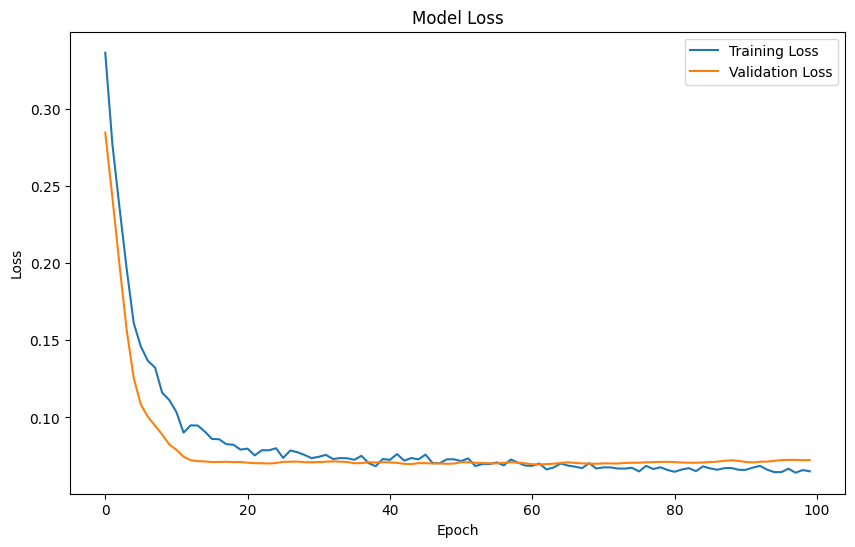

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Cross-validation scores: [0.15392228960990906, 0.1797722429037094, 0.10776177048683167, 0.14567522704601288, 0.08535294979810715]
Mean CV score: 0.1345
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
Feature sensitivities:
System Voltage: 0.0193
Fuel Temperature: 0.0131
Overall Failure Probability: 0.0121
Fuel Level: 0.0103
Pedal Sensor: 0.0095
Brake Control: 0.0090
Engine Temperature: 0.0069
Engine Oil Pressure: 0.0068
Fuel Pressure: 0

In [27]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, TimeSeriesSplit
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
import tensorflow as tf

def prepare_data(data, look_back=30):
    # Convert the 'Time' column to datetime format
    # data['DateTime'] = pd.to_datetime(data['time'])

    # # Sort by 'DateTime'
    # data = data.sort_values('DateTime')

    relevant_columns = [
        'Engine Oil Pressure', 'Engine Speed', 'Engine Temperature',
        'Brake Control', 'Transmission Pressure', 'Pedal Sensor',
        'Water Fuel', 'Fuel Level', 'Fuel Pressure', 'Fuel Temperature',
        'System Voltage', 'Exhaust Gas Temperature',
        'Hydraulic Pump Rate', 'Air Filter Pressure Drop',
        'Overall Failure Probability'
    ]
    data = data[relevant_columns]

    data = data.fillna(method='ffill').fillna(method='bfill')

    scaler = MinMaxScaler(feature_range=(0, 1))
    scaled_data = scaler.fit_transform(data)

    X, y = [], []
    for i in range(len(scaled_data) - look_back):
        X.append(scaled_data[i:(i + look_back), :])
        y.append(scaled_data[i + look_back, :])

    return np.array(X), np.array(y), scaler, data.columns

def predict_breakdown(model, last_sequence, scaler, thresholds, column_names, days_to_predict=30):
    predictions = []
    current_sequence = last_sequence.copy()

    for _ in range(days_to_predict):
        prediction = model.predict(current_sequence.reshape(1, current_sequence.shape[0], current_sequence.shape[1]))
        predictions.append(prediction[0])
        current_sequence = np.roll(current_sequence, -1, axis=0)
        current_sequence[-1] = prediction

    predictions = scaler.inverse_transform(np.array(predictions))
    breakdown_occurred = False

    for day, prediction in enumerate(predictions):
        if breakdown_occurred:
            break
        for i, col in enumerate(column_names):
            if col in thresholds:
                low, high = thresholds[col]
                if (prediction[i] < low or prediction[i] >= high):
                    print(f"Potential breakdown on day {day+1} due to {col}: {prediction[i]}")
                    return day + 1, col, prediction[i]

    print("No breakdown predicted in the next 30 days.")
    return None, None, None

def create_model(input_shape):
    model = Sequential([
        LSTM(50, return_sequences=True, input_shape=input_shape),
        Dropout(0.2),
        LSTM(50, return_sequences=False),
        Dropout(0.2),
        Dense(25),
        Dense(input_shape[1])
    ])
    model.compile(optimizer='adam', loss='mse')
    return model

def train_and_evaluate_model(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

    model = create_model((X.shape[1], X.shape[2]))
    history = model.fit(X_train, y_train, epochs=100, batch_size=32,
                        validation_data=(X_test, y_test), verbose=1)

    train_predictions = model.predict(X_train)
    test_predictions = model.predict(X_test)

    train_mse = mean_squared_error(y_train, train_predictions)
    test_mse = mean_squared_error(y_test, test_predictions)
    train_mae = mean_absolute_error(y_train, train_predictions)
    test_mae = mean_absolute_error(y_test, test_predictions)

    print(f"Train MSE: {train_mse:.4f}, Test MSE: {test_mse:.4f}")
    print(f"Train MAE: {train_mae:.4f}, Test MAE: {test_mae:.4f}")

    plt.figure(figsize=(10, 6))
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend()
    plt.show()

    return model, test_predictions

def perform_cross_validation(X, y, n_splits=5):
    tscv = TimeSeriesSplit(n_splits=n_splits)
    cv_scores = []

    for train_index, test_index in tscv.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]

        model = create_model((X.shape[1], X.shape[2]))
        model.fit(X_train, y_train, epochs=5, batch_size=32, verbose=0)

        score = model.evaluate(X_test, y_test, verbose=0)
        cv_scores.append(score)

    print(f"Cross-validation scores: {cv_scores}")
    print(f"Mean CV score: {np.mean(cv_scores):.4f}")

def sensitivity_analysis(model, X, scaler, column_names):
    sensitivity = {}
    baseline_pred = model.predict(X[-1].reshape(1, X.shape[1], X.shape[2]))

    for i, col in enumerate(column_names):
        X_perturbed = X[-1].copy()
        X_perturbed[:, i] *= 1.2
        perturbed_pred = model.predict(X_perturbed.reshape(1, X.shape[1], X.shape[2]))
        sensitivity[col] = np.mean(np.abs(perturbed_pred - baseline_pred))

    print("Feature sensitivities:")
    for col, sens in sorted(sensitivity.items(), key=lambda x: x[1], reverse=True):
        print(f"{col}: {sens:.4f}")

def check_feature_scaling(data):
    numerical_cols = data.select_dtypes(include=[np.number]).columns
    numerical_data = data[numerical_cols]

    scaler = MinMaxScaler(feature_range=(0, 1))
    scaled_data = scaler.fit_transform(numerical_data)

    print("Scaled Data Statistics:")
    print(pd.DataFrame(scaled_data, columns=numerical_data.columns).describe())

data = pd.read_csv('/content/drive/MyDrive/machine_failure_data.csv')

X, y, scaler, column_names = prepare_data(data)

print("X shape:", X.shape)
print("y shape:", y.shape)

print("NaN in X:", np.isnan(X).any())
print("NaN in y:", np.isnan(y).any())

if np.isnan(X).any() or np.isnan(y).any():
    print("Warning: There are still NaN values in X or y.")

model, test_predictions = train_and_evaluate_model(X, y)

thresholds = {
    'Engine Oil Pressure': (25, 65),
    'Engine Speed': (0, 1800),
    'Engine Temperature': (0, 105),
    'Brake Control': (1, 9),
    'Transmission Pressure': (200, 450),
    'Pedal Sensor': (0, 4.7),
    'Water Fuel': (0, 1800),
    'Fuel Level': (1, 10),
    'Fuel Pressure': (35, 75),
    'Fuel Temperature': (0, 400),
    'System Voltage': (12, 15),
    'Exhaust Gas Temperature': (0, 365),
    'Hydraulic Pump Rate': (0, 125),
    'Air Filter Pressure Drop': (0, 20),
    'Overall Failure Probability': (0.5, 1.0)
}

last_sequence = X[-1]

days_until_breakdown, failing_parameter, prediction_value = predict_breakdown(
    model, last_sequence, scaler, thresholds, column_names
)

if days_until_breakdown is not None:
    print(f"Breakdown likely in {days_until_breakdown} days due to {failing_parameter}. Predicted value: {prediction_value}.")
else:
    print("No breakdown predicted in the next 30 days.")

perform_cross_validation(X, y)

sensitivity_analysis(model, X, scaler, column_names)

check_feature_scaling(data)


In [28]:
import pandas as pd
import numpy as np
import random
from datetime import datetime, timedelta

random.seed(42)
np.random.seed(42)

thresholds = {
    "Engine Oil Pressure": {"high1": 15, "high2": 80, "low1": 20, "low2": 65, "high_prob": "High", "med_prob": "Medium", "low_prob": "Low"},
    "Engine Speed": {"low1": 1800, "low2": 2000, "med1": 2000, "med2": 2500, "high": 3000, "low_prob": "Low", "med_prob": "Medium", "high_prob": "High"},
    "Engine Temperature": {"low1": 200, "low2": 220, "med1": 220, "med2": 240, "high": 240, "low_prob": "Low", "med_prob": "Medium", "high_prob": "High"},
    "Brake Control": {"low1": 1, "low2": 1.2, "med1": 1.2, "med2": 1.5, "high": 1.5, "low_prob": "Low", "med_prob": "Medium", "high_prob": "High"},
    "Transmission Pressure": {"low": 200, "high": 450, "prob": "Medium"},
    "Pedal Sensor": {"high": 4.7, "prob": "Low"},
    "Water Fuel": {"high": 1800, "prob": "High"},
    "Fuel Level": {"low": 1, "prob": "Low"},
    "Fuel Pressure": {"low": 35, "high": 65, "prob": "Low"},
    "Fuel Temperature": {"high": 400, "prob": "High"},
    "System Voltage": {"low": 12.0, "high": 15.0, "prob": "High"},
    "Exhaust Gas Temperature": {"high": 365, "prob": "High"},
    "Hydraulic Pump Rate": {"high": 125, "prob": "Medium"},
    "Air Filter Pressure Drop": {"low": 20, "prob": "Medium"},
}

def generate_value(param, threshold):
    if param == "Engine Oil Pressure":
        return random.randint(0, 150)
    elif param == "Engine Speed":
        return random.choice([random.randint(500, 5000), 0])
    elif param == "Engine Temperature":
        return random.randint(50, 500)
    elif param == "Brake Control":
        return round(random.uniform(0.1, 2), 2)
    else:
        if "low" in threshold and "high" in threshold:
            return round(np.random.uniform(threshold["low"], threshold["high"]), 2)
        elif "low" in threshold:
            return round(np.random.uniform(0, threshold["low"]), 2)
        elif "high" in threshold:
            return round(np.random.uniform(threshold["high"], threshold["high"] + 50), 2)
        else:
            return round(np.random.uniform(0, 100), 2)

def determine_failure_probability(param, value, threshold):
    if param == "Engine Oil Pressure":
        if 0 <= value <= 15 or value > 80:
            return "High"
        elif 15 < value <= 20 or 70 < value <= 80:
            return "Medium"
        elif 20 < value <= 25 or 65 < value <= 70:
            return "Low"
    elif param == "Engine Speed":
        if 1800 <= value <= 2000:
            return "Low"
        elif 2000 < value <= 2500:
            return "Medium"
        elif value > 3000:
            return "High"
    elif param == "Engine Temperature":
        if 200 <= value <= 220:
            return "Low"
        elif 220 < value <= 240:
            return "Medium"
        elif value > 240:
            return "High"
    elif param == "Brake Control":
        if 1 <= value <= 1.2:
            return "Low"
        elif 1.2 < value <= 1.5:
            return "Medium"
        elif value > 1.5:
            return "High"
    else:
        if "low" in threshold and value < threshold["low"]:
            return threshold["prob"]
        if "high" in threshold and value > threshold["high"]:
            return threshold["prob"]
        return "Low"

num_records = 100
start_date = datetime.now().date()
start_time = datetime.now().replace(second=0, microsecond=0)
data = []

for i in range(num_records):
    record = {"date": start_date, "time": (start_time + timedelta(minutes=i)).time()}
    for param, threshold in thresholds.items():
        value = generate_value(param, threshold)
        record[param] = value
        record[f"{param} Failure Probability"] = determine_failure_probability(param, value, threshold)
    data.append(record)

df = pd.DataFrame(data)

probability_mapping = {"Low": 0.1, "Medium": 0.5, "High": 0.9}

df['Overall Failure Probability'] = df[[f"{param} Failure Probability" for param in thresholds]].applymap(probability_mapping.get).mean(axis=1)

df.to_csv("engine_data.csv", index=False)

df.head()


<ipython-input-28-4a1870c35b89>:98: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df['Overall Failure Probability'] = df[[f"{param} Failure Probability" for param in thresholds]].applymap(probability_mapping.get).mean(axis=1)


,date,time,Engine Oil Pressure,Engine Oil Pressure Failure Probability,Engine Speed,Engine Speed Failure Probability,Engine Temperature,Engine Temperature Failure Probability,Brake Control,Brake Control Failure Probability,...,Fuel Temperature Failure Probability,System Voltage,System Voltage Failure Probability,Exhaust Gas Temperature,Exhaust Gas Temperature Failure Probability,Hydraulic Pump Rate,Hydraulic Pump Rate Failure Probability,Air Filter Pressure Drop,Air Filter Pressure Drop Failure Probability,Overall Failure Probability
0,2025-03-27,03:53:00,28,None,0,None,175,None,0.52,None,...,High,12.17,Low,408.31,High,155.06,Medium,14.16,Medium,0.420000
1,2025-03-27,03:54:00,26,None,4967,High,352,High,0.90,None,...,High,12.91,Low,391.24,High,146.60,Medium,5.82,Medium,0.500000
2,2025-03-27,03:55:00,7,High,1267,None,169,None,1.06,Low,...,High,12.60,Low,390.71,High,154.62,Medium,0.93,Medium,0.433333
3,2025-03-27,03:56:00,6,High,0,None,162,None,0.95,None,...,High,12.91,Low,369.88,High,159.21,Medium,8.80,Medium,0.463636
4,2025-03-27,03:57:00,71,Medium,553,None,407,High,0.90,None,...,High,12.94,Low,391.00,High,152.34,Medium,3.70,Medium,0.466667


In [29]:
import pandas as pd
import numpy as np
import random
from datetime import datetime, timedelta

random.seed(42)
np.random.seed(42)

thresholds = {
    "Engine Oil Pressure": {"high1": 15, "high2": 80, "low1": 20, "low2": 65, "high_prob": 0.9, "med_prob": 0.5, "low_prob": 0.1},
    "Engine Speed": {"low1": 1800, "low2": 2000, "med1": 2000, "med2": 2500, "high": 3000, "low_prob": 0.1, "med_prob": 0.5, "high_prob": 0.9},
    "Engine Temperature": {"low1": 200, "low2": 220, "med1": 220, "med2": 240, "high": 240, "low_prob": 0.1, "med_prob": 0.5, "high_prob": 0.9},
    "Brake Control": {"low1": 1, "low2": 1.2, "med1": 1.2, "med2": 1.5, "high": 1.5, "low_prob": 0.1, "med_prob": 0.5, "high_prob": 0.9},
    "Transmission Pressure": {"low": 200, "high": 450, "prob": 0.5},
    "Pedal Sensor": {"high": 4.7, "prob": 0.1},
    "Water Fuel": {"high": 1800, "prob": 0.9},
    "Fuel Level": {"low": 1, "prob": 0.1},
    "Fuel Pressure": {"low": 35, "high": 65, "prob": 0.1},
    "Fuel Temperature": {"high": 400, "prob": 0.9},
    "System Voltage": {"low": 12.0, "high": 15.0, "prob": 0.9},
    "Exhaust Gas Temperature": {"high": 365, "prob": 0.9},
    "Hydraulic Pump Rate": {"high": 125, "prob": 0.5},
    "Air Filter Pressure Drop": {"low": 20, "prob": 0.5},
}

def generate_value(param, threshold):
    if param == "Engine Oil Pressure":
        return random.randint(0, 150)
    elif param == "Engine Speed":
        return random.choice([random.randint(500, 5000), 0])
    elif param == "Engine Temperature":
        return random.randint(50, 500)
    elif param == "Brake Control":
        return round(random.uniform(0.1, 2), 2)
    else:
        if "low" in threshold and "high" in threshold:
            return round(np.random.uniform(threshold["low"], threshold["high"]), 2)
        elif "low" in threshold:
            return round(np.random.uniform(0, threshold["low"]), 2)
        elif "high" in threshold:
            return round(np.random.uniform(threshold["high"], threshold["high"] + 50), 2)
        else:
            return round(np.random.uniform(0, 100), 2)

def determine_failure_probability(param, value, threshold):
    if param == "Engine Oil Pressure":
        if 0 <= value <= 15 or value > 80:
            return 0.9
        elif 15 < value <= 20 or 70 < value <= 80:
            return 0.5
        elif 20 < value <= 25 or 65 < value <= 70:
            return 0.1
    elif param == "Engine Speed":
        if 1800 <= value <= 2000:
            return 0.1
        elif 2000 < value <= 2500:
            return 0.5
        elif value > 3000:
            return 0.9
    elif param == "Engine Temperature":
        if 200 <= value <= 220:
            return 0.1
        elif 220 < value <= 240:
            return 0.5
        elif value > 240:
            return 0.9
    elif param == "Brake Control":
        if 1 <= value <= 1.2:
            return 0.1
        elif 1.2 < value <= 1.5:
            return 0.5
        elif value > 1.5:
            return 0.9
    else:
        if "low" in threshold and value < threshold["low"]:
            return threshold["prob"]
        if "high" in threshold and value > threshold["high"]:
            return threshold["prob"]
        return 0.1

num_records = 100
start_date = datetime.now().date()
start_time = datetime.now().replace(second=0, microsecond=0)
data = []

for i in range(num_records):
    record = {"date": start_date, "time": (start_time + timedelta(minutes=i)).time()}
    for param, threshold in thresholds.items():
        value = generate_value(param, threshold)
        record[param] = value
        record[f"{param} Failure Probability"] = determine_failure_probability(param, value, threshold)
    data.append(record)

df = pd.DataFrame(data)

df['Overall Failure Probability'] = df[[f"{param} Failure Probability" for param in thresholds]].mean(axis=1)

df.fillna(0, inplace=True)

df.to_csv("engine_data.csv", index=False)

df.head()
df.to_csv("machine_data.csv", index=False)

df.head()


,date,time,Engine Oil Pressure,Engine Oil Pressure Failure Probability,Engine Speed,Engine Speed Failure Probability,Engine Temperature,Engine Temperature Failure Probability,Brake Control,Brake Control Failure Probability,...,Fuel Temperature Failure Probability,System Voltage,System Voltage Failure Probability,Exhaust Gas Temperature,Exhaust Gas Temperature Failure Probability,Hydraulic Pump Rate,Hydraulic Pump Rate Failure Probability,Air Filter Pressure Drop,Air Filter Pressure Drop Failure Probability,Overall Failure Probability
0,2025-03-27,03:53:00,28,0.0,0,0.0,175,0.0,0.52,0.0,...,0.9,12.17,0.1,408.31,0.9,155.06,0.5,14.16,0.5,0.420000
1,2025-03-27,03:54:00,26,0.0,4967,0.9,352,0.9,0.90,0.0,...,0.9,12.91,0.1,391.24,0.9,146.60,0.5,5.82,0.5,0.500000
2,2025-03-27,03:55:00,7,0.9,1267,0.0,169,0.0,1.06,0.1,...,0.9,12.60,0.1,390.71,0.9,154.62,0.5,0.93,0.5,0.433333
3,2025-03-27,03:56:00,6,0.9,0,0.0,162,0.0,0.95,0.0,...,0.9,12.91,0.1,369.88,0.9,159.21,0.5,8.80,0.5,0.463636
4,2025-03-27,03:57:00,71,0.5,553,0.0,407,0.9,0.90,0.0,...,0.9,12.94,0.1,391.00,0.9,152.34,0.5,3.70,0.5,0.466667


X shape: (70, 30, 15)
y shape: (70, 15)
NaN in X: False
NaN in y: False
Epoch 1/100


<ipython-input-30-f9a8079acaa9>:22: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data = data.fillna(method='ffill').fillna(method='bfill')
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 346ms/step - loss: 0.3836 - val_loss: 0.2759
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 0.3026 - val_loss: 0.2300
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - loss: 0.2606 - val_loss: 0.2005
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - loss: 0.2352 - val_loss: 0.1761
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step - loss: 0.2112 - val_loss: 0.1529
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 0.1760 - val_loss: 0.1340
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 0.1693 - val_loss: 0.1204
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - loss: 0.1514 - val_loss: 0.1099
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - loss: 0.1462 - val_loss: 0.1010
Epoch 10/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - loss: 0.1325 - val_loss: 0.0963
Epoch 11/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 0.1329 - val_loss: 0.0930
Epoch 12/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 0.1250 - val_loss: 0.0918

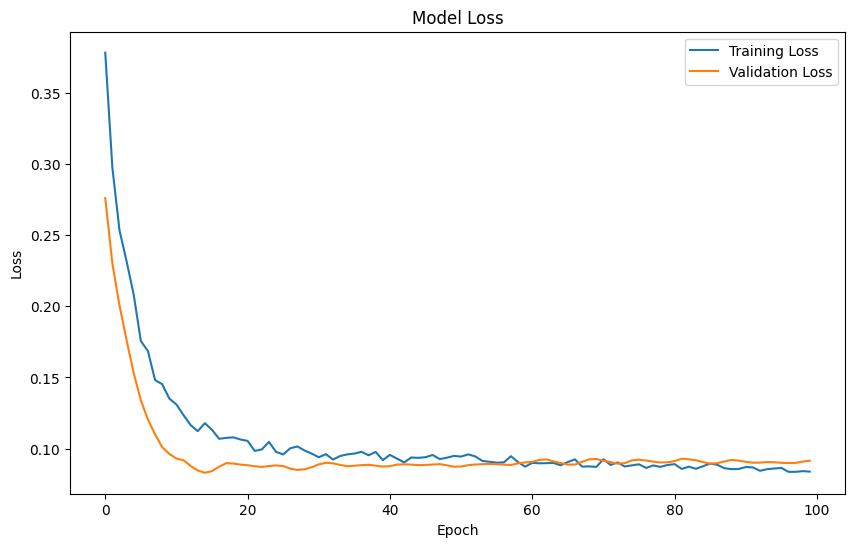

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Cross-validation scores: [0.17722606658935547, 0.13149958848953247, 0.12140045315027237, 0.10726457089185715, 0.09471426159143448]
Mean CV score: 0.1264
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
Feature sensitivities:
Brake Control: 0.0195
Engine Oil Pressure: 0.0158
Fuel Level: 0.0153
Engine Temperature: 0.0125
Water Fuel: 0.0110
Exhaust Gas Temperature: 0.0106
Air Filter Pressure Drop: 0.0095
Fuel Pressure: 0.0091
Overall Failur

In [30]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, TimeSeriesSplit
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.metrics import mean_squared_error, mean_absolute_error, accuracy_score
import matplotlib.pyplot as plt
import tensorflow as tf

def prepare_data(data, look_back=30):
    relevant_columns = [
        'Engine Oil Pressure', 'Engine Speed', 'Engine Temperature',
        'Brake Control', 'Transmission Pressure', 'Pedal Sensor',
        'Water Fuel', 'Fuel Level', 'Fuel Pressure', 'Fuel Temperature',
        'System Voltage', 'Exhaust Gas Temperature',
        'Hydraulic Pump Rate', 'Air Filter Pressure Drop',
        'Overall Failure Probability'
    ]
    data = data[relevant_columns]

    data = data.fillna(method='ffill').fillna(method='bfill')
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaled_data = scaler.fit_transform(data)

    X, y = [], []
    for i in range(len(scaled_data) - look_back):
        X.append(scaled_data[i:(i + look_back), :])
        y.append(scaled_data[i + look_back, :])

    return np.array(X), np.array(y), scaler, data.columns

def predict_breakdown(model, last_sequence, scaler, thresholds, column_names, days_to_predict=30):
    predictions = []
    current_sequence = last_sequence.copy()

    for _ in range(days_to_predict):
        prediction = model.predict(current_sequence.reshape(1, current_sequence.shape[0], current_sequence.shape[1]))
        predictions.append(prediction[0])
        current_sequence = np.roll(current_sequence, -1, axis=0)
        current_sequence[-1] = prediction

    predictions = scaler.inverse_transform(np.array(predictions))
    breakdown_occurred = False
    failure_counts = {}

    for day, prediction in enumerate(predictions):
        if breakdown_occurred:
            break
        for i, col in enumerate(column_names):
            if col in thresholds:
                low, high = thresholds[col]
                if (prediction[i] < low or prediction[i] >= high):
                    print(f"Potential breakdown on day {day+1} due to {col}: {prediction[i]}")
                    failure_counts[col] = failure_counts.get(col, 0) + 1
                    breakdown_occurred = True

    print("No breakdown predicted in the next 30 days.")

    top_failures = sorted(failure_counts.items(), key=lambda x: x[1], reverse=True)[:3]
    print("\nTop 3 parameters with the highest rate of failure:")
    for param, count in top_failures:
        print(f"{param}: {count} times")

    return None, None, None

def create_model(input_shape):
    model = Sequential([
        LSTM(50, return_sequences=True, input_shape=input_shape),
        Dropout(0.2),
        LSTM(50, return_sequences=False),
        Dropout(0.2),
        Dense(25),
        Dense(input_shape[1])
    ])
    model.compile(optimizer='adam', loss='mse')
    return model

def train_and_evaluate_model(X, y, thresholds):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

    model = create_model((X.shape[1], X.shape[2]))
    history = model.fit(X_train, y_train, epochs=100, batch_size=32,
                        validation_data=(X_test, y_test), verbose=1)

    train_predictions = model.predict(X_train)
    test_predictions = model.predict(X_test)

    train_mse = mean_squared_error(y_train, train_predictions)
    test_mse = mean_squared_error(y_test, test_predictions)
    train_mae = mean_absolute_error(y_train, train_predictions)
    test_mae = mean_absolute_error(y_test, test_predictions)

    print(f"Train MSE: {train_mse:.4f}, Test MSE: {test_mse:.4f}")
    print(f"Train MAE: {train_mae:.4f}, Test MAE: {test_mae:.4f}")

    test_actual_breakdown = np.any([(y_test[:, i] < thresholds[col][0]) | (y_test[:, i] >= thresholds[col][1])
                                    for i, col in enumerate(column_names)], axis=0)

    test_predicted_breakdown = np.any([(test_predictions[:, i] < thresholds[col][0]) | (test_predictions[:, i] >= thresholds[col][1])
                                       for i, col in enumerate(column_names)], axis=0)

    accuracy = accuracy_score(test_actual_breakdown, test_predicted_breakdown)
    print(f"Test Accuracy: {accuracy:.4f}")

    plt.figure(figsize=(10, 6))
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend()
    plt.show()

    return model, test_predictions

def perform_cross_validation(X, y, n_splits=5):
    tscv = TimeSeriesSplit(n_splits=n_splits)
    cv_scores = []

    for train_index, test_index in tscv.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]

        model = create_model((X.shape[1], X.shape[2]))
        model.fit(X_train, y_train, epochs=5, batch_size=32, verbose=0)

        score = model.evaluate(X_test, y_test, verbose=0)
        cv_scores.append(score)

    print(f"Cross-validation scores: {cv_scores}")
    print(f"Mean CV score: {np.mean(cv_scores):.4f}")

def sensitivity_analysis(model, X, scaler, column_names):
    sensitivity = {}
    baseline_pred = model.predict(X[-1].reshape(1, X.shape[1], X.shape[2]))

    for i, col in enumerate(column_names):
        X_perturbed = X[-1].copy()
        X_perturbed[:, i] *= 1.2
        perturbed_pred = model.predict(X_perturbed.reshape(1, X.shape[1], X.shape[2]))
        sensitivity[col] = np.mean(np.abs(perturbed_pred - baseline_pred))

    print("Feature sensitivities:")
    for col, sens in sorted(sensitivity.items(), key=lambda x: x[1], reverse=True):
        print(f"{col}: {sens:.4f}")

def check_feature_scaling(data):
    numerical_cols = data.select_dtypes(include=[np.number]).columns
    numerical_data = data[numerical_cols]

    scaler = MinMaxScaler(feature_range=(0, 1))
    scaled_data = scaler.fit_transform(numerical_data)

    print("Scaled Data Statistics:")
    print(pd.DataFrame(scaled_data, columns=numerical_data.columns).describe())

data = pd.read_csv('engine_data.csv')

X, y, scaler, column_names = prepare_data(data)

print("X shape:", X.shape)
print("y shape:", y.shape)

print("NaN in X:", np.isnan(X).any())
print("NaN in y:", np.isnan(y).any())

if np.isnan(X).any() or np.isnan(y).any():
    print("Warning: There are still NaN values in X or y.")

thresholds = {
    'Engine Oil Pressure': (25, 65),
    'Engine Speed': (0, 1800),
    'Engine Temperature': (0, 105),
    'Brake Control': (1, 9),
    'Transmission Pressure': (200, 450),
    'Pedal Sensor': (0, 4.7),
    'Water Fuel': (0, 1800),
    'Fuel Level': (1, 10),
    'Fuel Pressure': (35, 75),
    'Fuel Temperature': (0, 400),
    'System Voltage': (12, 15),
    'Exhaust Gas Temperature': (0, 365),
    'Hydraulic Pump Rate': (0, 125),
    'Air Filter Pressure Drop': (0, 20),
    'Overall Failure Probability': (0.5, 1.0)
}

model, test_predictions = train_and_evaluate_model(X, y, thresholds)

last_sequence = X[-1]

days_until_breakdown, failing_parameter, prediction_value = predict_breakdown(
    model, last_sequence, scaler, thresholds, column_names
)

if days_until_breakdown is not None:
    print(f"Breakdown likely in {days_until_breakdown} days due to {failing_parameter}. Predicted value: {prediction_value}.")
else:
    print("No breakdown predicted in the next 30 days.")

perform_cross_validation(X, y)

sensitivity_analysis(model, X, scaler, column_names)

check_feature_scaling(data)


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


X shape: (70, 30, 15)
y shape: (70, 15)
NaN in X: False
NaN in y: False
Epoch 1/400


<ipython-input-31-9b15642f36b3>:24: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data = data.fillna(method='ffill').fillna(method='bfill')
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - loss: 0.7356 - val_loss: 0.6759
Epoch 2/400
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - loss: 0.7103 - val_loss: 0.6607
Epoch 3/400
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step - loss: 0.6996 - val_loss: 0.6471
Epoch 4/400
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step - loss: 0.6831 - val_loss: 0.6348
Epoch 5/400
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step - loss: 0.6682 - val_loss: 0.6234
Epoch 6/400
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step - loss: 0.6530 - val_loss: 0.6125
Epoch 7/400
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 248ms/step - loss: 0.6462 - val_loss: 0.6022
Epoch 8/400
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step - loss: 0.6305 - val_loss: 0.5922
Epoch 9/400
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step - loss: 0.6287 - val_loss: 0.5826
Epoch 10/400
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step - loss: 0.6120 - val_loss: 0.5733
Epoch 11/400
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step - loss: 0.6037 - val_loss: 0.5642
Epoch 12/400
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step - loss: 0.5906 - val_loss: 0.5553

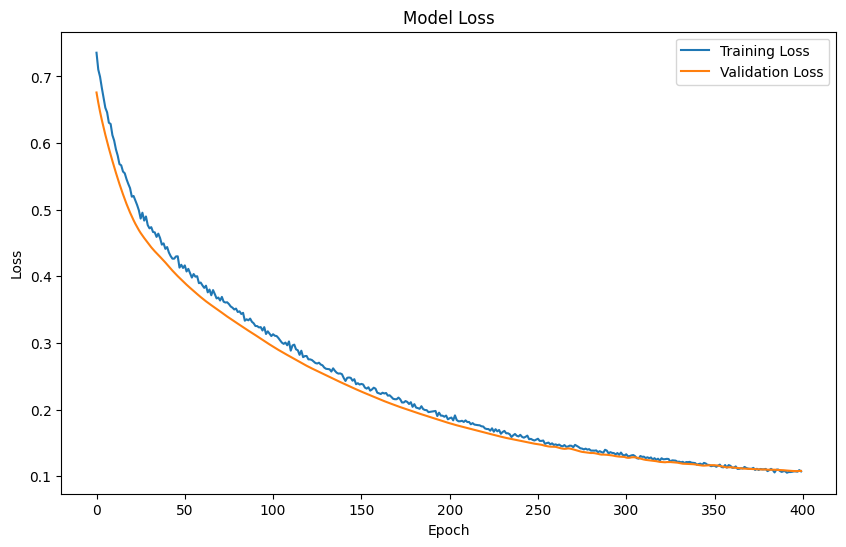

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Cross-validation scores: [0.3546175956726074, 0.3054623603820801, 0.21525239944458008, 0.21079811453819275, 0.1912926733493805]
Mean CV score: 0.2555
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
Feature sensitivities:
Engine Oil Pressure: 0.0077
Air Filter Pressure Drop: 0.0049
Exhaust Gas Temperature: 0.0034
Pedal Sensor: 0.0022
Transmission Pressure: 0.0021
Water Fuel: 0.0021
System Voltage: 0.0015
Fuel Level: 0.0015
Fuel Temperatu

In [31]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, TimeSeriesSplit
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.regularizers import l2
from sklearn.metrics import mean_squared_error, mean_absolute_error, accuracy_score
import matplotlib.pyplot as plt
import tensorflow as tf

def prepare_data(data, look_back=30):
    relevant_columns = [
        'Engine Oil Pressure', 'Engine Speed', 'Engine Temperature',
        'Brake Control', 'Transmission Pressure', 'Pedal Sensor',
        'Water Fuel', 'Fuel Level', 'Fuel Pressure', 'Fuel Temperature',
        'System Voltage', 'Exhaust Gas Temperature',
        'Hydraulic Pump Rate', 'Air Filter Pressure Drop',
        'Overall Failure Probability'
    ]
    data = data[relevant_columns]

    data = data.fillna(method='ffill').fillna(method='bfill')

    scaler = MinMaxScaler(feature_range=(0, 1))
    scaled_data = scaler.fit_transform(data)

    X, y = [], []
    for i in range(len(scaled_data) - look_back):
        X.append(scaled_data[i:(i + look_back), :])
        y.append(scaled_data[i + look_back, :])

    return np.array(X), np.array(y), scaler, data.columns

def predict_breakdown(model, last_sequence, scaler, thresholds, column_names, days_to_predict=30):
    predictions = []
    current_sequence = last_sequence.copy()

    for _ in range(days_to_predict):
        prediction = model.predict(current_sequence.reshape(1, current_sequence.shape[0], current_sequence.shape[1]))
        predictions.append(prediction[0])
        current_sequence = np.roll(current_sequence, -1, axis=0)
        current_sequence[-1] = prediction

    predictions = scaler.inverse_transform(np.array(predictions))
    breakdown_occurred = False
    failure_counts = {}

    for day, prediction in enumerate(predictions):
        if breakdown_occurred:
            break
        for i, col in enumerate(column_names):
            if col in thresholds:
                low, high = thresholds[col]
                if (prediction[i] < low or prediction[i] >= high):
                    print(f"Potential breakdown on day {day+1} due to {col}: {prediction[i]}")
                    failure_counts[col] = failure_counts.get(col, 0) + 1
                    breakdown_occurred = True

    print("No breakdown predicted in the next 30 days.")

    top_failures = sorted(failure_counts.items(), key=lambda x: x[1], reverse=True)[:3]
    print("\nTop 3 parameters with the highest rate of failure:")
    for param, count in top_failures:
        print(f"{param}: {count} times")

    return None, None, None

def create_model(input_shape):
    model = Sequential([
        LSTM(30, return_sequences=True, input_shape=input_shape),
        Dropout(0.3),
        LSTM(20, return_sequences=False),
        Dropout(0.3),
        Dense(25, kernel_regularizer=l2(0.01)),
        Dense(input_shape[1], kernel_regularizer=l2(0.01))
    ])
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='mse')
    return model

def train_and_evaluate_model(X, y, thresholds):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

    model = create_model((X.shape[1], X.shape[2]))
    early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

    history = model.fit(X_train, y_train, epochs=400, batch_size=64,
                        validation_data=(X_test, y_test), verbose=1,
                        callbacks=[early_stopping])

    train_predictions = model.predict(X_train)
    test_predictions = model.predict(X_test)

    train_mse = mean_squared_error(y_train, train_predictions)
    test_mse = mean_squared_error(y_test, test_predictions)
    train_mae = mean_absolute_error(y_train, train_predictions)
    test_mae = mean_absolute_error(y_test, test_predictions)

    print(f"Train MSE: {train_mse:.4f}, Test MSE: {test_mse:.4f}")
    print(f"Train MAE: {train_mae:.4f}, Test MAE: {test_mae:.4f}")

    test_actual_breakdown = np.any([(y_test[:, i] < thresholds[col][0]) | (y_test[:, i] >= thresholds[col][1])
                                    for i, col in enumerate(column_names)], axis=0)

    test_predicted_breakdown = np.any([(test_predictions[:, i] < thresholds[col][0]) | (test_predictions[:, i] >= thresholds[col][1])
                                       for i, col in enumerate(column_names)], axis=0)

    accuracy = accuracy_score(test_actual_breakdown, test_predicted_breakdown)
    print(f"Test Accuracy: {accuracy:.4f}")

    plt.figure(figsize=(10, 6))
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend()
    plt.show()

    return model, test_predictions

def perform_cross_validation(X, y, n_splits=5):
    tscv = TimeSeriesSplit(n_splits=n_splits)
    cv_scores = []

    for train_index, test_index in tscv.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]

        model = create_model((X.shape[1], X.shape[2]))
        model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=0)

        score = model.evaluate(X_test, y_test, verbose=0)
        cv_scores.append(score)

    print(f"Cross-validation scores: {cv_scores}")
    print(f"Mean CV score: {np.mean(cv_scores):.4f}")

def sensitivity_analysis(model, X, scaler, column_names):
    sensitivity = {}
    baseline_pred = model.predict(X[-1].reshape(1, X.shape[1], X.shape[2]))

    for i, col in enumerate(column_names):
        X_perturbed = X[-1].copy()
        X_perturbed[:, i] *= 1.2
        perturbed_pred = model.predict(X_perturbed.reshape(1, X.shape[1], X.shape[2]))
        sensitivity[col] = np.mean(np.abs(perturbed_pred - baseline_pred))

    print("Feature sensitivities:")
    for col, sens in sorted(sensitivity.items(), key=lambda x: x[1], reverse=True):
        print(f"{col}: {sens:.4f}")

def check_feature_scaling(data):
    numerical_cols = data.select_dtypes(include=[np.number]).columns
    numerical_data = data[numerical_cols]

    scaler = MinMaxScaler(feature_range=(0, 1))
    scaled_data = scaler.fit_transform(numerical_data)

    print("Scaled Data Statistics:")
    print(pd.DataFrame(scaled_data, columns=numerical_data.columns).describe())

data = pd.read_csv('machine_data.csv')

X, y, scaler, column_names = prepare_data(data)

print("X shape:", X.shape)
print("y shape:", y.shape)

print("NaN in X:", np.isnan(X).any())
print("NaN in y:", np.isnan(y).any())

if np.isnan(X).any() or np.isnan(y).any():
    print("Warning: There are still NaN values in X or y.")

thresholds = {
    'Engine Oil Pressure': (25, 65),
    'Engine Speed': (0, 1800),
    'Engine Temperature': (0, 105),
    'Brake Control': (1, 9),
    'Transmission Pressure': (200, 450),
    'Pedal Sensor': (0, 4.7),
    'Water Fuel': (0, 1800),
    'Fuel Level': (1, 10),
    'Fuel Pressure': (35, 75),
    'Fuel Temperature': (0, 400),
    'System Voltage': (12, 15),
    'Exhaust Gas Temperature': (0, 365),
    'Hydraulic Pump Rate': (0, 125),
    'Air Filter Pressure Drop': (0, 20),
    'Overall Failure Probability': (0.5, 1.0)
}

model, test_predictions = train_and_evaluate_model(X, y, thresholds)
last_sequence = X[-1]
days_until_breakdown, failing_parameter, prediction_value = predict_breakdown(
    model, last_sequence, scaler, thresholds, column_names
)

if days_until_breakdown is not None:
    print(f"Breakdown likely in {days_until_breakdown} days due to {failing_parameter}. Predicted value: {prediction_value}.")
else:
    print("No breakdown predicted in the next 30 days.")

perform_cross_validation(X, y)

sensitivity_analysis(model, X, scaler, column_names)

check_feature_scaling(data)